In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from opt_utils_v1a import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils_v1a import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    np.random.seed(seed)
    m = X.shape[1]
    mini_batches = []

    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1, m))
    num_complete_minibatches = math.floor(m/mini_batch_size)
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k + 1) * mini_batch_size].reshape((1, mini_batch_size))
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size :]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [14]:
def initialize_adam(parameters):
    L = len(parameters) // 2
    v = {}
    s = {}
    for l in range(L):
        v["dW" + str(l + 1)] = np.zeros(parameters["W" + str(l + 1)].shape)
        v["db" + str(l + 1)] = np.zeros(parameters["b" + str(l + 1)].shape)
        s["dW" + str(l + 1)] = np.zeros(parameters["W" + str(l + 1)].shape)
        s["db" + str(l + 1)] = np.zeros(parameters["b" + str(l + 1)].shape)
    return v, s

In [6]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8):
    L = len(parameters) // 2
    v_corrected = {}
    s_corrected = {}
    for l in range(L):
        v["dW" + str(l + 1)] = beta1 * v["dW" + str(l + 1)] + (1 - beta1) * grads["dW" + str(l + 1)]
        v["db" + str(l + 1)] = beta1 * v["db" + str(l + 1)] + (1 - beta1) * grads["db" + str(l + 1)]
        v_corrected["dW" + str(l + 1)] = v["dW" + str(l + 1)] / (1 - beta1**t)
        v_corrected["db" + str(l + 1)] = v["db" + str(l + 1)] / (1 - beta1**t)
        s["dW" + str(l + 1)] = beta2 * s["dW" + str(l + 1)] + (1 - beta2) * np.square(grads["dW" + str(l + 1)])
        s["db" + str(l + 1)] = beta2 * s["db" + str(l + 1)] + (1 - beta2) * np.square(grads["db" + str(l + 1)])
        s_corrected["dW" + str(l + 1)] = s["dW" + str(l + 1)] / (1 - beta2**2)
        s_corrected["db" + str(l + 1)] = s["db" + str(l + 1)] / (1 - beta2**2)
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * v_corrected["dW" + str(l + 1)] / (np.sqrt(s_corrected["dW" + str(l + 1)]) + epsilon)
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * v_corrected["db" + str(l + 1)] / (np.sqrt(s_corrected["db" + str(l + 1)]) + epsilon)
    return parameters, v, s

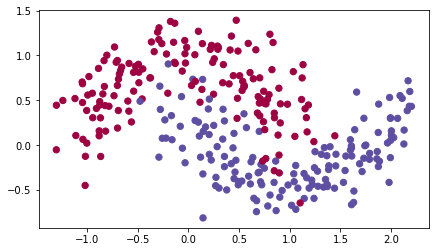

In [7]:
train_X, train_Y = load_dataset()

In [16]:
def model(X, Y, layers_dims, learning_rate= 0.0007, mini_batch_size = 64,
        beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    L = len(layers_dims)
    costs = []
    t = 0
    seed = 10
    m = X.shape[1]
    parameters = initialize_parameters(layers_dims)
    v, s = initialize_adam(parameters)

    for i in range(num_epochs):
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        for minibatch in minibatches:
            (minibatch_X, minibatch_Y) = minibatch
            a3, caches = forward_propagation(minibatch_X, parameters)
            cost_total += compute_cost(a3, minibatch_Y)
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)
            t = t + 1
            parameters, v, s = update_parameters_with_adam(parameters, grads, v, s, t, learning_rate, beta1, beta2, epsilon)
        cost_avg = cost_total / m
        if print_cost and i % 1000 == 0:
            print("Cost after epoch %i: %f"%(i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    return parameters

Cost after epoch 0: 0.702104
Cost after epoch 1000: 0.644240
Cost after epoch 2000: 0.594380
Cost after epoch 3000: 0.560040
Cost after epoch 4000: 0.532859
Cost after epoch 5000: 0.502726
Cost after epoch 6000: 0.462032
Cost after epoch 7000: 0.407301
Cost after epoch 8000: 0.356799
Cost after epoch 9000: 0.327776


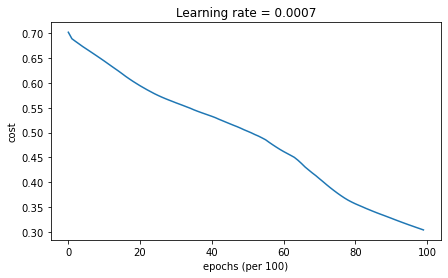

Accuracy: 0.92


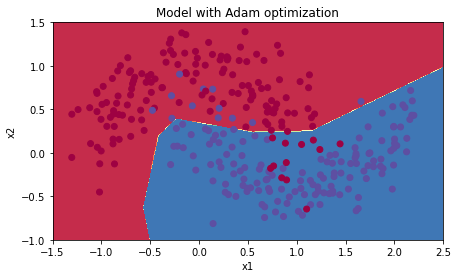

In [17]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims)
predictions = predict(train_X, train_Y, parameters)
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5, 2.5])
axes.set_ylim([-1, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)